### Exercise 1: 1D interpolation  
1. Write a function that, given a value \( \Delta \), constructs a uniformly sampled table of values

   $$
   x_i = i\Delta \quad \text{and} \quad y_i = \frac{\sin{x_i}}{x_i}, \quad i = -N \ldots N, \quad N = \left\lceil \frac{10}{\Delta} \right\rceil
   $$

   and uses `scipy.interpolate.interp1d` to return a piecewise linear interpolant function based on this table.

   Note: $\text{Sinc}(0) = 1$.


In [7]:
### Code Here
from scipy.interpolate import interp1d
import numpy as np
def interpolant(delta):
    N = int(np.ceil(10 / delta))
    x = np.arange(-N, N + 1) * delta
    y = np.sinc(x / np.pi)  
    y[x == 0] = 1
    return interp1d(x, y, kind='linear')

delta = 0.5
interp = interpolant(delta)
interp
points = np.array([-10, -5, 0, 5, 10])
interp(points)

array([-0.05440211, -0.19178485,  1.        , -0.19178485, -0.05440211])

2. Call your function to generate an interpolant for Δ=0.5. Choose 50 random
x -values between -10 and 10 and use your interpolant to estimate the
function values at these points. Plot the interpolated values and the
original function (different color). Record the first random x -value.

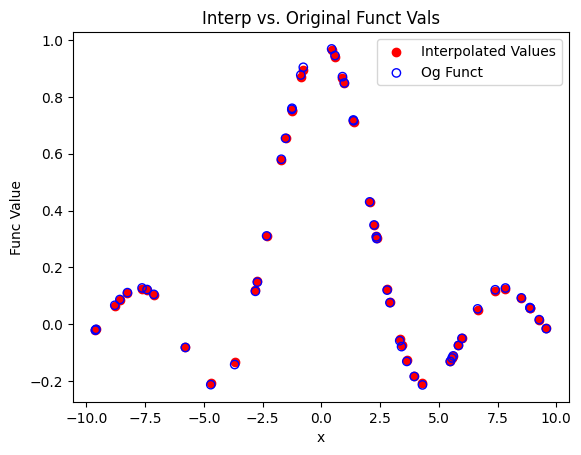

In [9]:
### Code Here
import matplotlib.pyplot as plt
np.random.seed(0)  # Seed
x_val = np.random.uniform(-10, 10, 50)
interp_val = interp(x_val)
og_val = np.sinc(x_val/np.pi)

plt.scatter(x_val, interp_val, color='r', label='Interpolated Values')
plt.scatter(x_val, og_val, facecolors='none', edgecolors='b', label='Og Funct')
plt.legend()
plt.title('Interp vs. Original Funct Vals')
plt.xlabel('x')
plt.ylabel('Func Value')
plt.show()



3. New plot:
Create a loop that varies $\Delta$ from 1 to $10^{-4}$ logarithmically, decreasing by a factor of 3 with each iteration. For each iteration, generate the interpolant for the corresponding value of $\Delta$, compute the value of the interpolant at your recorded x-value, and plot the error in the interpolated value against $\Delta$ on a log-log plot. For a piecewise linear interpolation, you should expect the error to scale like $\Delta^2$. Plot the line $\Delta^2$ on your figure to compare to your points.

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
C:\Users\eklav\AppData\Local\Temp\ipykernel_40000\3898156270.py:16: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Error in Interp Value vs. $\Delta$')
C:\Users\eklav\AppData\Local\Temp\ipykernel_40000\3898156270.py:17: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta$')


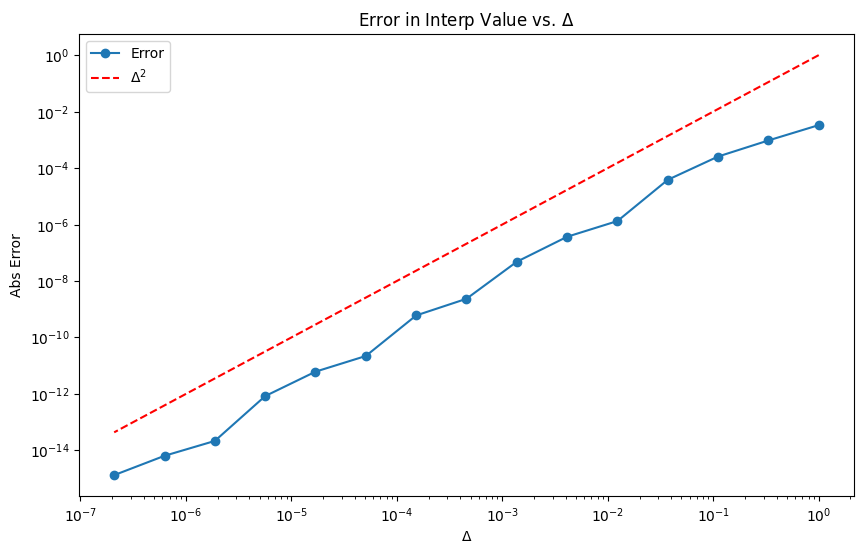

0.9762700785464951

In [11]:
### Code Here
rand_x = x_val[0]
deltas = np.array([1 / (3**i) for i in range(15)])  
errors = []

for i in deltas:
    interp = interpolant(i)
    interpolated_value = interp(rand_x)
    original_value = np.sinc(rand_x / np.pi)
    error = np.abs(interpolated_value - original_value)
    errors.append(error)
plt.figure(figsize=(10, 6))
plt.loglog(deltas, errors, 'o-', label='Error')
plt.loglog(deltas, deltas**2, 'r--', label=r'$\Delta^2$')
plt.legend()
plt.title('Error in Interp Value vs. $\Delta$')
plt.xlabel('$\Delta$')
plt.ylabel('Abs Error')
plt.show()
rand_x

### Exercise 2: 2D interpolation

Let's use `RectBivariateSpline` to do bicubic interpolation of the function

$$
f(r) = e^{-r/5} \cos 2r
$$

where $r$ = $\sqrt{x^2 + y^2}$.

In [19]:
### Code Here
from scipy.interpolate import RectBivariateSpline
def f(x, y):
    r = np.sqrt(x**2 + y**2)
    return np.exp(-r/5) * np.cos(2*r)
# here is part 1


1. As before, write a function that, given $\Delta$, returns a bicubic interpolant of the above function for gridded data in the domain $[-10,10]$ $\times [-10,10]$ with spacing $\Delta$.

In [18]:
### Code Here
def interpol_new(delta):
    x = np.arange(-10, 10 + delta, delta)
    y = np.arange(-10, 10 + delta, delta)
    # meshgrid
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    # f_x
    F = np.exp(-R / 5) * np.cos(2 * R)
    return RectBivariateSpline(x, y, F)
delta = 0.5
interp = interpol_new(delta)
interp.ev(0,0) #evaluating at 0,0 


array(1.)

2. Use your function to generate an interpolant for $\Delta$=0.5. Choose 1000 random $(x, y)$ pairs in the above domain and evaluate the interpolant at those points.


In [20]:
### Code Here
rand_x = np.random.uniform(-10, 10, 1000)
rand_y = np.random.uniform(-10, 10, 1000)
interp_vals = interp.ev(rand_x, rand_y)
interp_vals[:10] #just listing values for testing

array([-0.35100976,  0.10437686,  0.11223631,  0.15205263,  0.02378249,
       -0.00391167, -0.35830222, -0.19630158, -0.3151517 , -0.17200369])

3. Make a 3D scatter plot of your interpolated $(x, y, f)$ values colored according to the interpolated $f$ values.


Text(0.5, 0.92, '3D Scatter Plot of interp vals')

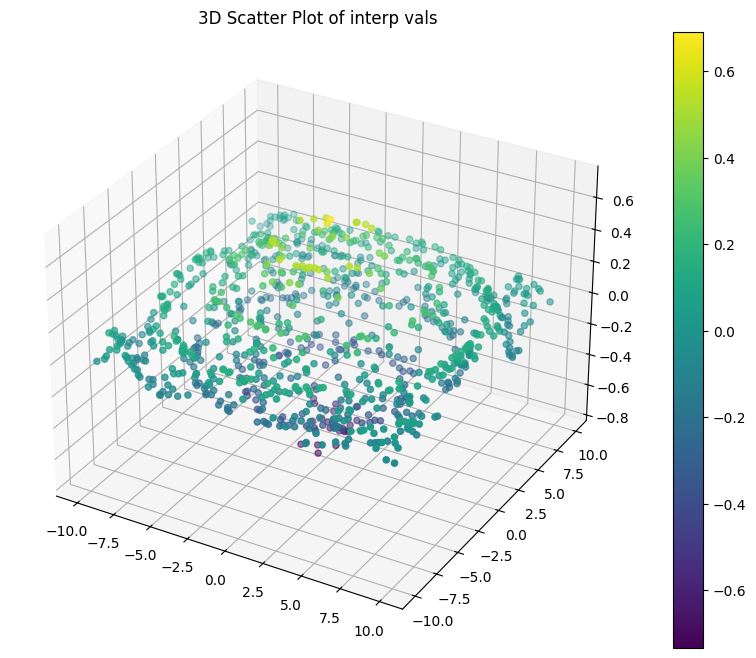

In [26]:
### Code Here
fig = plt.figure(figsize=(12, 8))
axis = fig.add_subplot(111, projection='3d')
scatter = axis.scatter(rand_x, rand_y, interp_vals, c=interp_vals, cmap='viridis')
plt.colorbar(scatter, ax=axis)
axis.set_title('3D Scatter Plot of interp vals')